In [1]:
!pip install pandas numpy matplotlib statsmodels



Demonstration of implementing a SARIMA model for a time series dataset with visualizations.Generating a synthetic time series dataset with a clear seasonal pattern.

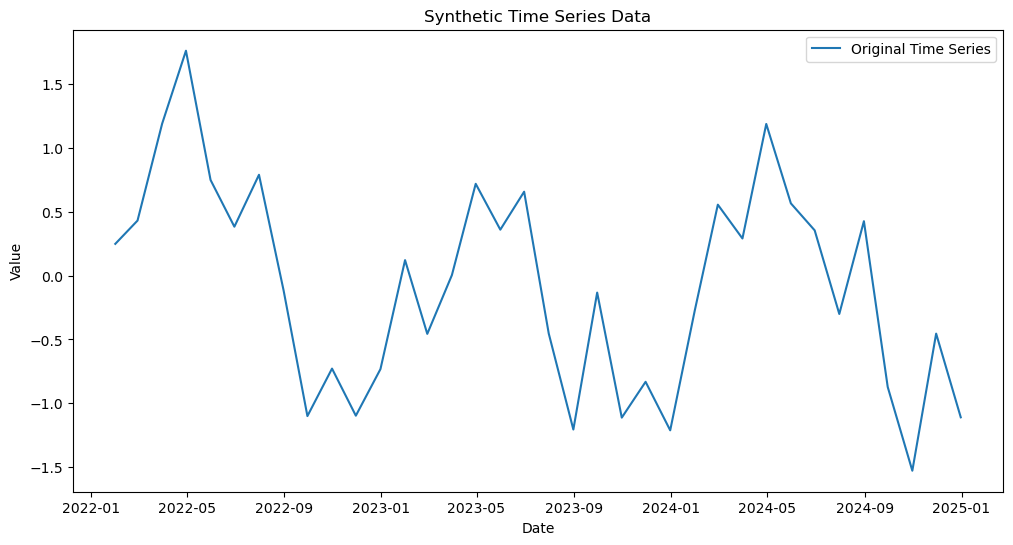

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2024-12-31', freq='M')
data = np.sin(np.arange(len(date_rng)) * 2 * np.pi / 12)  # Monthly seasonality
noise = np.random.normal(0, 0.5, size=len(date_rng))
ts_data = pd.Series(data + noise, index=date_rng)

# Visualize the synthetic time series data
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Original Time Series')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Decomposing the time series data to better understand its components.

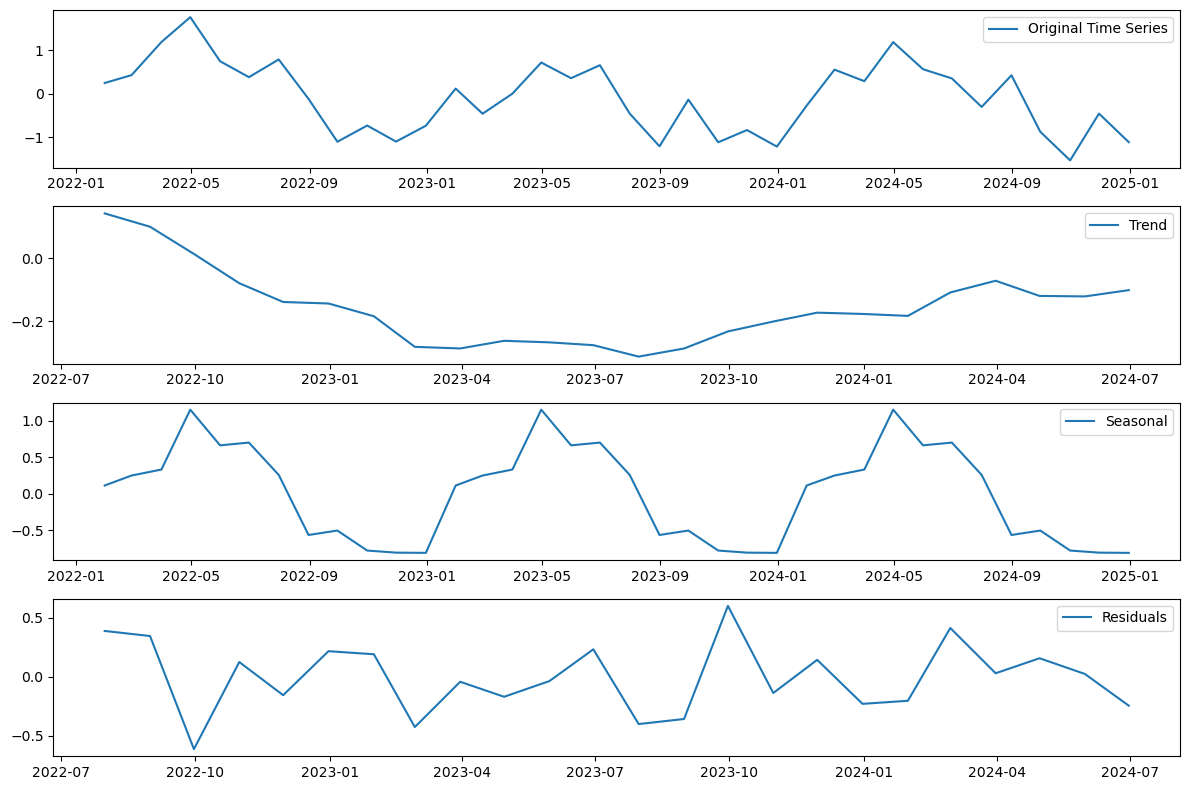

In [3]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(ts_data, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(ts_data, label='Original Time Series')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


Fitting a SARIMA model to the synthetic time series data.

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


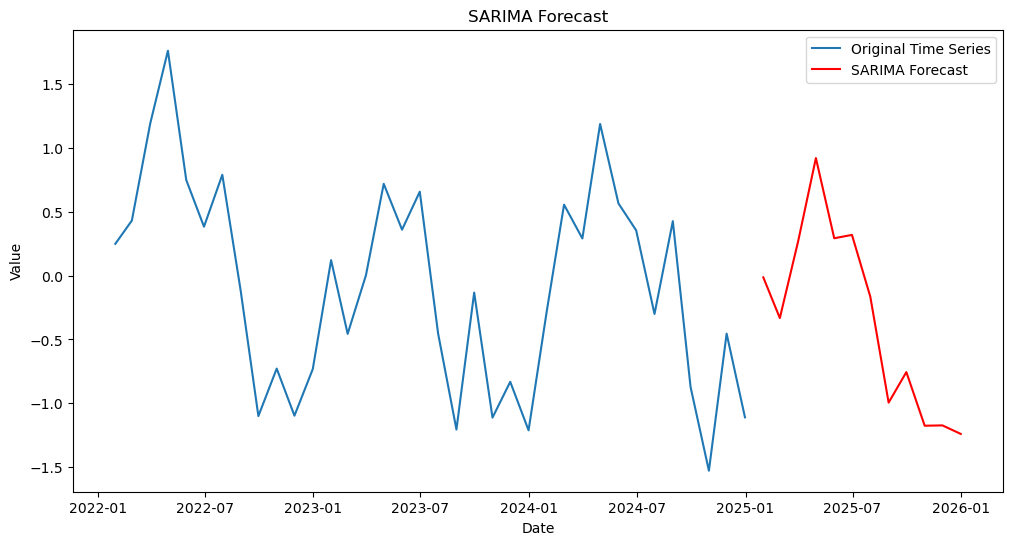

In [4]:
# Choose appropriate values for p, d, q, P, D, Q, and s based on decomposition and ACF/PACF plots
p, d, q = 1, 1, 1  # Example values for ARIMA
P, D, Q, s = 1, 1, 1, 12  # Example values for seasonal component

# Fit the SARIMA model
model = SARIMAX(ts_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Generate predictions
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean

# Visualize the original data and predicted values
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Original Time Series')
plt.plot(predicted_values, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Evaluating the model and display diagnostic plots.

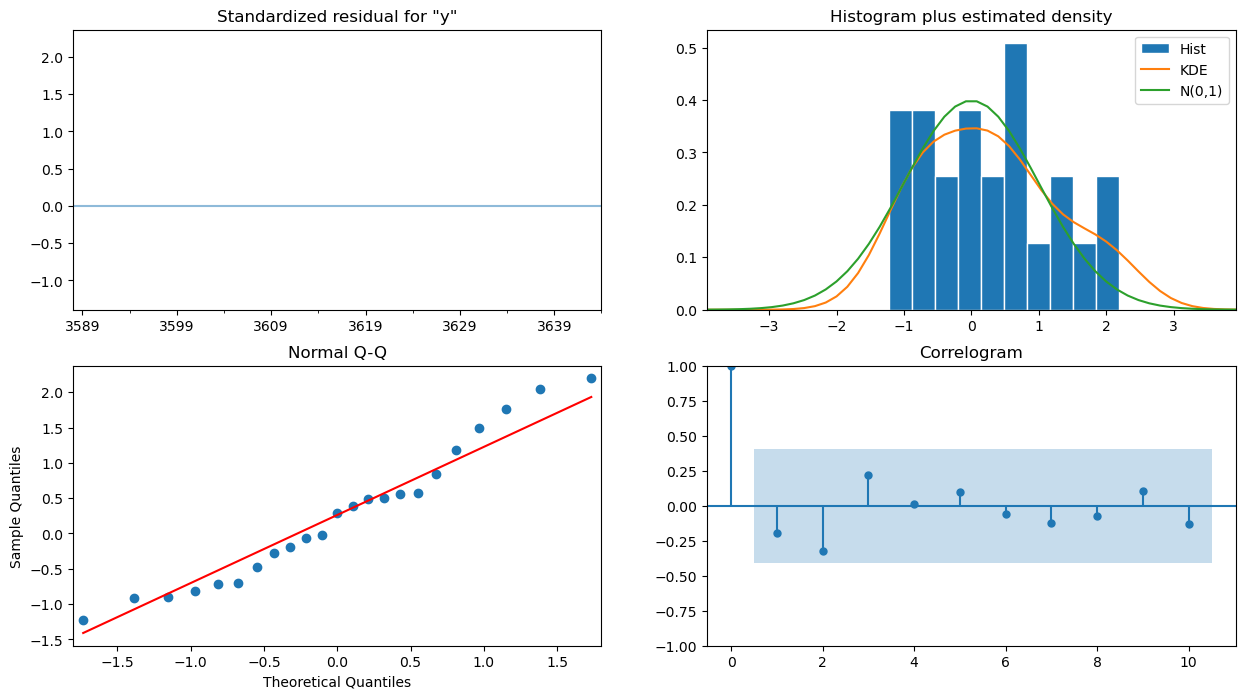

In [5]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

In [10]:
import requests

def get_linked_list_problems():
    url = "https://leetcode.com/api/problems/all/"
    response = requests.get(url)
    
    if response.status_code == 200:
        problems = response.json().get("stat_status_pairs", [])
        linked_list_problems = [
            problem["stat"] for problem in problems
            if "linked-list" in problem.get("tags", [])
        ]
        return linked_list_problems
    else:
        print(f"Failed to fetch problems. Status code: {response.status_code}")
        return []

# Example usage
linked_list_problems = get_linked_list_problems()
for problem in linked_list_problems:
    print(f"{problem['question_id']}. {problem['question__title']}")

